In [2]:
import numpy as np
from scipy.stats import genextreme
from scipy import stats
import matplotlib.pyplot as plt

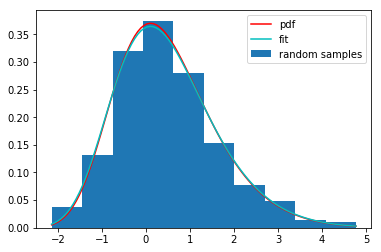

In [3]:
# Fit GEV to data generated by GEV

shape = 0.1
location = 0
scale = 1
N = 1000
samples = genextreme.rvs(shape,location,scale,N)
fitShape, fitLoc, fitScale = genextreme.fit(samples)

fig, ax = plt.subplots(1,1)
ax.hist(samples, density=True, label='random samples')
xs = np.linspace(samples.min(), samples.max(), 100)
ax.plot(xs, genextreme.pdf(xs, shape, location, scale), 'r-', label='pdf')
ax.plot(xs, genextreme.pdf(xs, fitShape, fitLoc, fitScale), 'c-', label='fit')
ax.legend(loc='best',frameon=True)
plt.show()

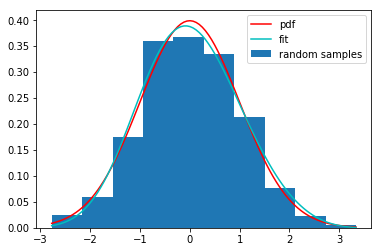

In [4]:
# Fit GEV to data generated by Gaussian

location = 0
scale = 1

samples = stats.norm.rvs(size=1000)

fitShape, fitLoc, fitScale = genextreme.fit(samples)

fig, ax = plt.subplots(1,1)
ax.hist(samples, density=True, label='random samples')
xs = np.linspace(samples.min(), samples.max(), 100)
ax.plot(xs, stats.norm.pdf(xs), 'r-', label='pdf')
ax.plot(xs, genextreme.pdf(xs, fitShape, fitLoc, fitScale), 'c-', label='fit')
ax.legend(loc='best',frameon=True)
plt.show()

/home/cleap/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2276: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


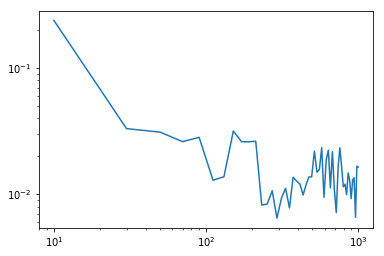

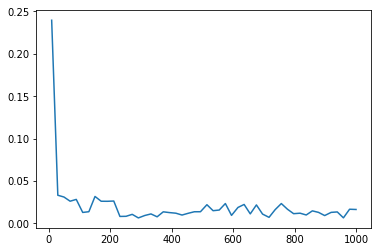

In [6]:
# Test RMSE between GEV fit and Gaussian curve against sample sizes

location = 0
scale = 1
xs = np.linspace(-3,3,num=1000)
Ns = np.linspace(10,1000,dtype=int)
# Ns = [100]
rmses = []
for N in Ns:
    samples = stats.norm.rvs(location,scale,N)
    fitShape, fitLoc, fitScale = genextreme.fit(samples)
    realYs = stats.norm.pdf(xs,location,scale)
    calcYs = genextreme.pdf(xs,fitShape,fitLoc,fitScale)
    e = realYs-calcYs
    se = np.power(e,2)
    mse = np.mean(se)
    rmse = np.sqrt(mse)
    rmses.append(rmse)
plt.loglog(Ns,rmses)
plt.show()
plt.plot(Ns,rmses)
plt.show()

In [130]:
# Distribution-fitting method outline from http://www.insightsbot.com/blog/WEjdW/fitting-probability-distributions-with-python-part-1

def fit_dist(samples):
    dist_tests = ['norm', 'expon', 'uniform', 'rayleigh', 'pareto', 
                  'genextreme']
    dist_results = []
    params = {}
    for dist_name in dist_tests:

        # Fit sample data to distribution
        dist = getattr(stats, dist_name)
        param = dist.fit(samples)
        params[dist_name] = param

        # Run the Kolmogorov-Smirnov test on the distribution
        D, p = stats.kstest(samples, dist_name, args = param)

        dist_results.append((dist_name, p))

#     print("Kolmogorov-Smirnov test results")
#     for result in dist_results:
#         print("%15s\t: %.15f"%(result[0], result[1]))
#     dist_guess, p = (max(dist_results, key=lambda item:item[1]))
#     print()
#     print("Distribution guess is %s with a p value of %.15f"%(dist_guess, p))
#     print()
    return dist_results

In [138]:
outfile = open("gev_fit_in.csv", 'w')

shapes = np.linspace(-1,1,1000)
for n,shape in enumerate(shapes):
    print(n)
    samples = genextreme.rvs(shape,size=1000)
    dist_results = fit_dist(samples)
    for i,result in enumerate(dist_results):
        outfile.write(format("%.15f,"%result[1]))
    outfile.write(format("%.15f\n"%shape))

outfile.close()

0


/home/cleap/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/home/cleap/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2276: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


987
988
989
990
991
992
993
994
995
996
997
998
999


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


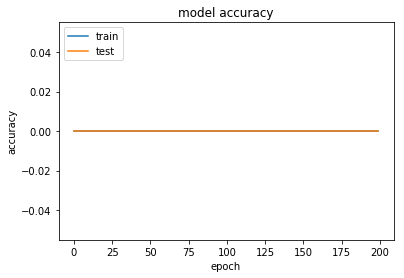

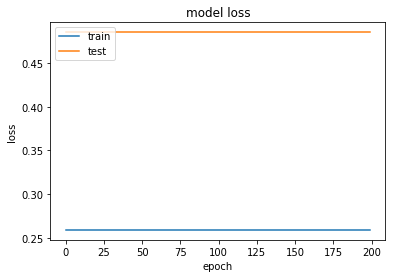

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

dataset = np.loadtxt("gev_fit_in.csv",delimiter=',')

X = dataset[:,:-1]
Y = dataset[:,-1]

model = Sequential()
# model.add(Dense(6, activation='relu', input_dim=6))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(3, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.add(Dense(1, activation='relu'))
model.add(Dense(100, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y,
                    epochs=200,
                    batch_size=10,
                    verbose=0,
                    validation_split=0.33)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

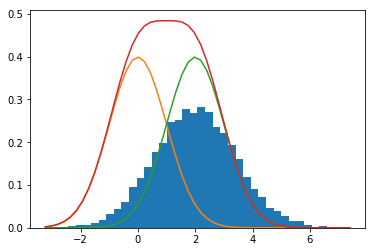

In [39]:
'''
Expectation maximization for 3 distributions from 2 distributions
Use 9 parameters from EM guess into Keras

----

Pass normalized histogram bin values into Keras
'''
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

N = 10000
samples = []

for n in range(N):
    sample = stats.norm.rvs(loc=0,scale=1) + stats.norm.rvs(loc=2,scale=1)
    samples.append(sample)
    
plt.hist(samples, bins=40, density=True)
xs = np.linspace(min(samples),max(samples))
plt.plot(xs,stats.norm.pdf(xs,loc=0,scale=1))
plt.plot(xs,stats.norm.pdf(xs,loc=2,scale=1))
plt.plot(xs,stats.norm.pdf(xs,loc=0,scale=1) + 
            stats.norm.pdf(xs,loc=2,scale=1))
plt.show()
# print(stats.norm.rvs(loc=0,scale=1))